<b>Задание</b>
1. Восстановите пропуски в столбце kitchen_area. 
2. Добавьте информацию из датасета region.csv.
3. Исследуйте рынок недвижимости в РФ за представленный период. Величина исследования - цена за м2.
4. Определите от каких признаков зависит стоимость объекта недвижимости. Найдите скрытые закономерности.
5. Когда выгодно покупать/продавать объект недвижимости?
6. Создайте модель прогноза цены объекта недвижимости.


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LassoCV, RidgeCV
from scipy.stats.mstats import zscore
import math
import plotly.express as px
import chart_studio.plotly as py 
import cufflinks as cf

from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df_1 = pd.read_csv('realty_18_21.csv')
df_1.head()

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,81,3,13,14,2,60.0,10.0,1


In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   price          int64  
 1   date           object 
 2   region         int64  
 3   building_type  int64  
 4   level          int64  
 5   levels         int64  
 6   rooms          int64  
 7   area           float64
 8   kitchen_area   float64
 9   object_type    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 417.9+ MB


In [5]:
df_1 = df_1.query('price>0')

In [6]:
df_1['object_type'].unique()

array([ 1, 11], dtype=int64)

In [7]:
df_1['object_type'] = df_1['object_type'].replace(11,2)

In [8]:
df_1['building_type'].unique()

array([1, 3, 4, 2, 5, 0], dtype=int64)

In [9]:
df_1['rooms'].unique()

array([ 3,  2,  1,  4, -1,  5,  7,  6,  8,  9, -2, 10], dtype=int64)

In [10]:
df_1 = df_1.query('rooms>-2')

In [11]:
df_1['date'] = pd.to_datetime(df_1['date'])
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5476275 entries, 0 to 5477005
Data columns (total 10 columns):
 #   Column         Dtype         
---  ------         -----         
 0   price          int64         
 1   date           datetime64[ns]
 2   region         int64         
 3   building_type  int64         
 4   level          int64         
 5   levels         int64         
 6   rooms          int64         
 7   area           float64       
 8   kitchen_area   float64       
 9   object_type    int64         
dtypes: datetime64[ns](1), float64(2), int64(7)
memory usage: 459.6 MB


In [12]:
df_1['kitchen_area'].isna().sum()

253690

In [13]:
df_1[df_1.duplicated()==True]

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type
466,1300000,2018-09-08,9654,1,5,10,1,41.36,10.88,2
516,906660,2018-09-08,9654,1,8,10,1,33.58,5.00,2
589,1050000,2018-09-08,9654,1,3,10,1,33.58,5.00,1
604,2250000,2018-09-08,9654,1,10,10,2,64.00,12.00,1
627,940000,2018-09-08,9654,1,4,10,1,33.58,5.00,2
...,...,...,...,...,...,...,...,...,...,...
5475660,5000000,2021-05-01,3991,1,7,9,3,65.00,8.60,1
5475971,3900000,2021-05-01,2604,3,4,10,2,48.00,9.00,1
5476318,5280000,2021-05-01,2661,2,14,18,1,44.00,10.00,1
5476380,6400000,2021-05-01,3991,3,6,9,2,87.00,19.50,1


In [14]:
df_1.drop_duplicates(inplace=True)

In [15]:
df_1.head()

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,2843,4,12,16,2,38.0,5.0,2
4,5450000,2018-03-01,81,3,13,14,2,60.0,10.0,1


In [16]:
df_1 = df_1.query('level<=levels')
df_1 = df_1.reset_index()

Займёмся заполнение пропусков в столбце 'kitchen_area'. Так как количество пропусков является значительным, а замена их на средние значения приведёт к ситуации, когда площадь кухни больше площади самой квартиры, с помощью различных моделей регрессии посчитаем прогнозные значения площади кухни на основе имеющихся данных по общей площади квартиры. Сравним основные показатели линейных и нелинейных моделей регрессии, и на основе лучшей модели заполним пропуски предсказанными значениями. 

In [17]:
df_1.query('kitchen_area>area')

,index,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type
501,502,4599000,2018-09-08,9654,3,6,10,2,5.60,7.70,1
668,673,1350000,2018-09-08,9654,1,5,10,1,13.78,48.02,2
4444,4500,1570000,2018-09-08,1010,3,4,5,1,32.00,65.00,1
5656,5740,1740900,2018-09-09,9654,1,4,10,2,58.03,78.00,2
5946,6055,1350000,2018-09-09,9654,1,5,10,1,13.78,48.02,2
...,...,...,...,...,...,...,...,...,...,...,...
4864759,5098955,37884000,2021-03-01,2871,2,3,6,3,172.00,340.00,2
4925026,5159539,950000,2021-03-16,3991,3,1,3,1,15.00,23.00,1
4985249,5220266,2300000,2021-03-26,3991,3,1,5,1,31.00,60.00,1
5218943,5455773,2750000,2021-04-30,9648,4,3,3,2,45.00,45.60,1


In [18]:
df_1[df_1['kitchen_area'].isnull()]

,index,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type
19,19,1650000,2018-03-16,2843,3,5,5,2,51.00,NaN,1
42,42,4400000,2018-04-14,81,3,11,14,2,54.00,NaN,1
78,78,2980000,2018-06-04,4417,1,7,9,2,52.00,NaN,1
114,114,2900000,2018-07-12,81,3,2,9,1,37.50,NaN,1
136,136,5800000,2018-07-31,2661,2,6,14,1,47.10,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
5239922,5476919,3247500,2021-05-01,6543,0,7,12,-1,43.30,NaN,2
5239927,5476924,4250770,2021-05-01,6543,0,12,12,2,59.87,NaN,2
5239982,5476979,23319120,2021-05-01,3,2,2,11,3,96.36,NaN,2
5239985,5476982,13403880,2021-05-01,3,2,4,23,2,59.10,NaN,2


In [19]:
import statsmodels.formula.api as smf

In [20]:
model = smf.ols(formula = 'kitchen_area ~ area', data = df_1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           kitchen_area   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                 3.726e+05
Date:                Wed, 06 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:55:23   Log-Likelihood:            -1.8388e+07
No. Observations:             4987396   AIC:                         3.678e+07
Df Residuals:                 4987394   BIC:                         3.678e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4441      0.008    789.910      0.0

In [21]:
df_kit = df_1.query('kitchen_area<area')

In [22]:
model = smf.ols(formula = 'kitchen_area ~ area', data = df_kit).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           kitchen_area   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                 1.156e+06
Date:                Wed, 06 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:55:26   Log-Likelihood:            -1.5560e+07
No. Observations:             4983332   AIC:                         3.112e+07
Df Residuals:                 4983330   BIC:                         3.112e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4028      0.005   1378.968      0.0

In [23]:
df_kit_power = df_kit[['area','kitchen_area']]
df_kit_power['area'] = df_kit_power['area'].map(lambda x: math.log(x))
df_kit_power['kitchen_area'] = df_kit_power['kitchen_area'].map(lambda x: math.log(x))

In [24]:
model = smf.ols(formula = 'kitchen_area ~ area', data = df_kit_power).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           kitchen_area   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                 2.519e+06
Date:                Wed, 06 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:55:31   Log-Likelihood:            -2.3565e+06
No. Observations:             4983332   AIC:                         4.713e+06
Df Residuals:                 4983330   BIC:                         4.713e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4726      0.002   -273.835      0.0

In [25]:
df_kit_exp = df_kit[['area','kitchen_area']]
df_kit_exp['area'] = df_kit_exp['area'].map(lambda x: math.log(x))

In [26]:
model = smf.ols(formula = 'kitchen_area ~ area', data = df_kit_exp).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           kitchen_area   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                 1.608e+06
Date:                Wed, 06 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:55:34   Log-Likelihood:            -1.5383e+07
No. Observations:             4983332   AIC:                         3.077e+07
Df Residuals:                 4983330   BIC:                         3.077e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.0983      0.024   -810.455      0.0

In [27]:
df_kit_half_log = df_kit[['area','kitchen_area']]
df_kit_half_log['kitchen_area'] = df_kit_half_log['kitchen_area'].map(lambda x: math.log(x))

In [28]:
model = smf.ols(formula = 'kitchen_area ~ area', data = df_kit_half_log).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           kitchen_area   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                 8.770e+05
Date:                Wed, 06 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:55:37   Log-Likelihood:            -2.9721e+06
No. Observations:             4983332   AIC:                         5.944e+06
Df Residuals:                 4983330   BIC:                         5.944e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9580      0.000   5273.001      0.0

Как можно заметить наилучшими показателями обладает степенная модель регрессии, следовательно, за основу моделирования пустых значений возьмём прогнозные значения степенной модели.

In [29]:
model_1 = smf.ols(formula = 'kitchen_area ~ area', data = df_kit_power).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:           kitchen_area   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                 2.519e+06
Date:                Wed, 06 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:55:42   Log-Likelihood:            -2.3565e+06
No. Observations:             4983332   AIC:                         4.713e+06
Df Residuals:                 4983330   BIC:                         4.713e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4726      0.002   -273.835      0.0

In [30]:
df_1.loc[df_1['kitchen_area'].isnull(),'area']

19         51.00
42         54.00
78         52.00
114        37.50
136        47.10
           ...  
5239922    43.30
5239927    59.87
5239982    96.36
5239985    59.10
5239986    58.20
Name: area, Length: 252613, dtype: float64

In [31]:
a = df_1.loc[df_1['kitchen_area'].isnull(),'area']
a = a.map(lambda x: math.log(x))
a = a.to_numpy()

In [32]:
x_predict = {'area':a}
y_bar = model_1.predict(x_predict)
y_bar = y_bar.map(lambda x: math.e**x)
y_bar

0          9.700192
1         10.095072
2          9.832579
3          7.826331
4          9.176179
            ...    
252608     8.652837
252609    10.849124
252610    15.124503
252611    10.751527
252612    10.636965
Length: 252613, dtype: float64

In [33]:
y_bar = pd.DataFrame(y_bar)
y_bar['Index'] = pd.DataFrame(df_1.loc[df_1['kitchen_area'].isnull()==True,'kitchen_area'].index)

In [34]:
y_bar = y_bar.rename(columns={0:'kitchen_area'})
y_bar = y_bar.set_index('Index')
y_bar

,kitchen_area
Index,
19,9.700192
42,10.095072
78,9.832579
114,7.826331
136,9.176179
...,...
5239922,8.652837
5239927,10.849124
5239982,15.124503


In [35]:
df_1['kitchen_area'] = df_1['kitchen_area'].fillna(y_bar['kitchen_area'])
df_1.loc[df_1['kitchen_area'].isnull(),'kitchen_area']

Series([], Name: kitchen_area, dtype: float64)

In [36]:
df_1['kitchen_area'].isna().sum()

0

Ура, победа, мы заменили пропущенные значения на предсказанные наилучшей моделью значения площади кухни на основе площади квартиры. 

Теперь займёмся обработкой данных из другого датасета

In [37]:
data = pd.read_csv('region.csv')
data = data.rename(columns={'code':'region'})
data.head()

,region,reg_name
0,2661,Санкт-Петербург
1,3446,Ленинградская область
2,3,Москва
3,81,Московская область
4,2843,Краснодарский край


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   region    83 non-null     object
 1   reg_name  83 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [39]:
data[data['region'] == '7873, 6937']

,region,reg_name
36,"7873, 6937",Республика Крым


In [40]:
data.loc[len(data.index)] = ['6937', 'Республика Крым']
data.loc[data['region'] == '7873, 6937','region']=7873

In [41]:
data['region'] = data['region'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   region    84 non-null     int32 
 1   reg_name  84 non-null     object
dtypes: int32(1), object(1)
memory usage: 1.6+ KB


In [42]:
mapping = dict(zip(data['region'], data['reg_name']))

In [43]:
df_1['region'] = df_1['region'].map(mapping)

# Исследуйте рынок недвижимости в РФ за представленный период. Величина исследования - цена за м2.

In [44]:
total_stat = df_1['price'].describe()
q75 = total_stat['75%']
q25 = total_stat['25%']
iqr = q75-q25 #межквартильный размах
iqr

2940000.0

In [45]:
iqr_min = q25 - 1.5*iqr
iqr_max = q75 +1.5*iqr

In [46]:
iqr_max

9350000.0

In [47]:
ejections_1= df_1['price'][df_1['price'] >= iqr_max].count()
print('Количество выбросов (считая те, которые лежат на границе):', ejections_1)

Количество выбросов (считая те, которые лежат на границе): 405650


In [48]:
df_1 = df_1.query('price<=9350000.0')

In [49]:
df_2 = df_1.drop('index',axis=1)
df_2

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,Санкт-Петербург,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,Московская область,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,Нижегородская область,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,Краснодарский край,4,12,16,2,38.0,5.0,2
4,5450000,2018-03-01,Московская область,3,13,14,2,60.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...
5239999,6400000,2021-05-01,Московская область,3,4,17,3,82.0,10.6,1
5240000,7200000,2021-05-01,Ленинградская область,2,2,3,2,59.0,22.3,2
5240001,4900000,2021-05-01,Санкт-Петербург,1,2,5,1,31.0,6.0,1
5240003,9000000,2021-05-01,Ставропольский край,3,4,5,4,178.0,20.0,1


In [50]:
df_2['p_per_m'] = round(df_2['price']/df_2['area'],2)
df_2

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,p_per_m
0,6050000,2018-02-19,Санкт-Петербург,1,8,10,3,82.6,10.8,1,73244.55
1,8650000,2018-02-27,Московская область,3,5,24,2,69.1,12.0,1,125180.90
2,4000000,2018-02-28,Нижегородская область,1,5,9,3,66.0,10.0,1,60606.06
3,1850000,2018-03-01,Краснодарский край,4,12,16,2,38.0,5.0,2,48684.21
4,5450000,2018-03-01,Московская область,3,13,14,2,60.0,10.0,1,90833.33
...,...,...,...,...,...,...,...,...,...,...,...
5239999,6400000,2021-05-01,Московская область,3,4,17,3,82.0,10.6,1,78048.78
5240000,7200000,2021-05-01,Ленинградская область,2,2,3,2,59.0,22.3,2,122033.90
5240001,4900000,2021-05-01,Санкт-Петербург,1,2,5,1,31.0,6.0,1,158064.52
5240003,9000000,2021-05-01,Ставропольский край,3,4,5,4,178.0,20.0,1,50561.80


Не советую запускать. Графики являются конечно внушительными, но не совсем информативными. К тому же время ожидания будет большим

Так как я ждал около 10-ти минут, чтобы прогрузились данные графики, прибегнем к выборке данных, чтобы не нагружать нас процессор и работать гораздо быстрее и продуктивнее

In [51]:
np.random.seed(123)
df = df_2.sample(n=500000)
df.head()

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,p_per_m
3757157,6169640,2020-06-30,Москва,1,2,17,1,42.20,16.00,2,146200.00
4590439,3950000,2020-12-08,Московская область,3,14,17,1,37.20,10.00,1,106182.80
4801021,8400000,2021-02-16,Московская область,2,6,9,2,65.00,12.12,1,129230.77
5079120,6490000,2021-04-09,Нижегородская область,3,4,8,1,45.12,10.25,2,143838.65
3999946,3540000,2020-08-04,Санкт-Петербург,3,2,6,-1,29.30,1.00,1,120819.11


In [52]:
task_1 = df.groupby('region')['p_per_m'].mean().sort_values(ascending=False).reset_index().head(10)
px.bar(task_1,x='region',y='p_per_m')

Исходя из диаграммы можно сказать, что стереотип о дорогом жилье в Москве и Московской области является правдивым не только на словах, но и на цифрах

In [53]:
task_1_2= df.groupby('rooms')['p_per_m'].mean().sort_values(ascending=False).reset_index().head(10)
px.bar(task_1_2,x='rooms',y='p_per_m')

Отметим следующее: чем меньше количество квартир, тем больше средняя стоимость квадратного метра площади

In [54]:
task_1_2_1= df.groupby('rooms')['price'].count()
px.bar(task_1_2_1)

Мы не наблюдаем обратную связь между спросом на ту или иную квартиру и количеством комнат в квартире (исходя из предыдущего графика напрашивалась следующая связь: чем дороже в среднем квадратный метр квартиры, тем меньше на неё спрос). Несмотря на то, что средняя стоимость квадратного метра квартиры с 4 и более комнатами меньше, чем у студий/однушек, они не пользуются спросом, так как большая часть людей попросту не обладает тем количеством капитала, которое необходимо для покупки подобного рода квартиры, да и необходимость в 3-ёх и более комнатах есть отнюдь не у всех

Так как предметом анализа является средняя стоимость квартиры для начала воспользуемся основными методами эконометрики, чтобы упростить дальнейшее исследование

In [55]:
df.head()

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,p_per_m
3757157,6169640,2020-06-30,Москва,1,2,17,1,42.20,16.00,2,146200.00
4590439,3950000,2020-12-08,Московская область,3,14,17,1,37.20,10.00,1,106182.80
4801021,8400000,2021-02-16,Московская область,2,6,9,2,65.00,12.12,1,129230.77
5079120,6490000,2021-04-09,Нижегородская область,3,4,8,1,45.12,10.25,2,143838.65
3999946,3540000,2020-08-04,Санкт-Петербург,3,2,6,-1,29.30,1.00,1,120819.11


In [56]:
columns = df.columns
columns = columns.drop(['region','levels'])
columns

Index(['price', 'date', 'building_type', 'level', 'rooms', 'area',
       'kitchen_area', 'object_type', 'p_per_m'],
      dtype='object')

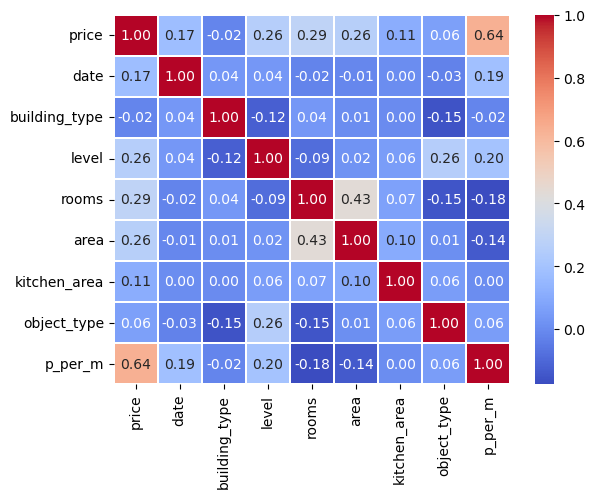

In [57]:
corr = df[columns].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.3)
plt.show()

Как можно заметить, связь между ценой за квадратный метр и остальными факторами в большинстве своём является едва ли заметной (за исключением самой цены квартиры по понятным причинам)

(array([17652., 17775., 17897., 18017., 18140., 18262., 18383., 18506.,
        18628., 18748.]),
 [Text(17652.0, 0, '2018-05'),
  Text(17775.0, 0, '2018-09'),
  Text(17897.0, 0, '2019-01'),
  Text(18017.0, 0, '2019-05'),
  Text(18140.0, 0, '2019-09'),
  Text(18262.0, 0, '2020-01'),
  Text(18383.0, 0, '2020-05'),
  Text(18506.0, 0, '2020-09'),
  Text(18628.0, 0, '2021-01'),
  Text(18748.0, 0, '2021-05')])

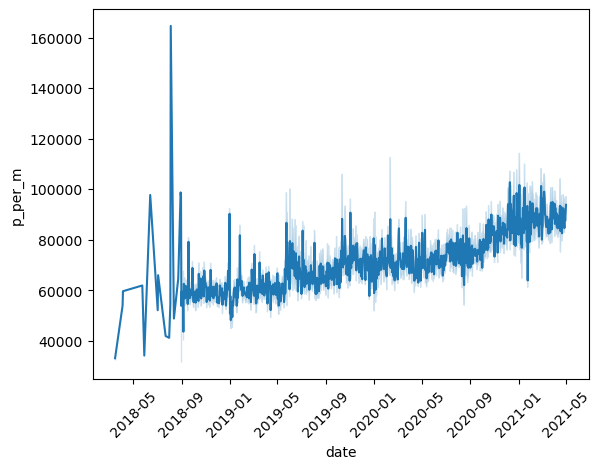

In [58]:
sns.lineplot(x=df['date'],y=df['p_per_m'])
plt.xticks(rotation=45)

Можно заметить явную тенденцию к росту средней цены за квадратный метр с течением времени. Данный факт может быть обусловлен в большинстве своём инфляцией 

In [59]:
task_1_3= df.groupby('building_type')['p_per_m'].mean().sort_values(ascending=False).reset_index().head(5)
px.bar(task_1_3,x='building_type',y='p_per_m')

Где: building_type - Тип дома. 0 - Другое. 1 - Панельный. 2 - Кирпично-монолитный. 3 - Кирпичный. 4 - Блочный 5 - Деревянный

In [60]:
task_1_4= df.groupby('level')['p_per_m'].mean().sort_values(ascending=False).reset_index()
px.bar(task_1_4,x='level',y='p_per_m')

Несмотря на то, что коэффициент корреляции между этажом квартиры и средней стоимостью квадратного метра жилья равен 0.2, можно заметить довольно очевидную прямую связь между признаком фактором и признаком результатом. 

In [61]:
task_1_5= df.groupby('object_type')['p_per_m'].mean().sort_values(ascending=False).reset_index()
px.bar(task_1_5,x='object_type',y='p_per_m')

Где: object_type -  1 - Вторичный рынок; 2 - Новостройка;

Всё-таки средняя цена квадратного метра квартиры дороже в новостройке по довольно объективным причинам. Посмотрим связь между спросом и типом строительного объекта

In [62]:
task_1_5_1= df.groupby('object_type')['price'].count()
px.bar(task_1_5_1)

Так как вторичное жильё дешевле, мы пришли к довольно естественным выводам. 

Итог по разделу: 
1. Наблюдается прямая линейная связь между средней ценой за кв.метр и датой покупки квартиры. Такая же ситуация с этажом самого помещения. 
2. Подтвердился довольно очевидный стереотип о дорогом жилье в Москве и СПБ. 
3. Также подтвердилось естественное предположение, что в новостройках квадратный метр дороже
4. Кирпично-монолитные дома иимеют наибольшую среднюю цену за кв.метр

# Определите от каких признаков зависит стоимость объекта недвижимости. Найдите скрытые закономерности.

In [63]:
df

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,p_per_m
3757157,6169640,2020-06-30,Москва,1,2,17,1,42.20,16.00,2,146200.00
4590439,3950000,2020-12-08,Московская область,3,14,17,1,37.20,10.00,1,106182.80
4801021,8400000,2021-02-16,Московская область,2,6,9,2,65.00,12.12,1,129230.77
5079120,6490000,2021-04-09,Нижегородская область,3,4,8,1,45.12,10.25,2,143838.65
3999946,3540000,2020-08-04,Санкт-Петербург,3,2,6,-1,29.30,1.00,1,120819.11
...,...,...,...,...,...,...,...,...,...,...,...
815841,3600000,2018-12-31,Нижегородская область,1,4,9,3,63.40,7.20,1,56782.33
4966232,2551700,2021-03-21,Свердловская область,2,12,14,-1,26.86,5.04,2,95000.00
5009482,3450000,2021-03-31,Новосибирская область,1,9,9,3,60.00,7.00,1,57500.00
2264565,3750000,2019-08-27,Краснодарский край,4,7,9,3,73.00,9.00,1,51369.86


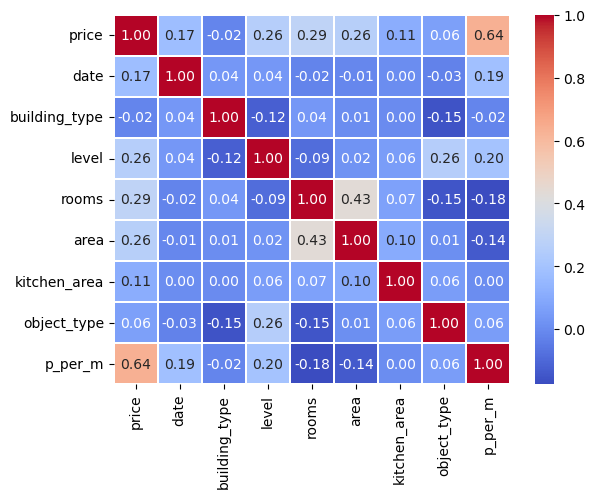

In [64]:
corr = df[columns].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.3)
plt.show()

Основными призаками факторами, влияющими на общую цену квартиры, стали этаж помещения, количество комнат и площадь квартиры. Хотелось отметить отсутствие интеркорреляции между признаками (Rx(i)x(j)max=0.43<0.7). 

In [65]:
import statsmodels.formula.api as smf

In [66]:
model = smf.ols(formula = 'price ~ level + rooms+area', data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                 3.689e+04
Date:                Wed, 06 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:57:24   Log-Likelihood:            -7.8894e+06
No. Observations:              500000   AIC:                         1.578e+07
Df Residuals:                  499996   BIC:                         1.578e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.482e+06   6174.030    240.054      0.0

In [67]:
model = smf.ols(formula = 'price ~ level + rooms+area', data = df_2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                 3.663e+05
Date:                Wed, 06 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:57:26   Log-Likelihood:            -7.6270e+07
No. Observations:             4835088   AIC:                         1.525e+08
Df Residuals:                 4835084   BIC:                         1.525e+08
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.44e+06   1995.918    721.668      0.0

In [68]:
st.f.ppf(1-0.05, 499996, 3)

8.526455421684691

По итогам сводки можем сказать, что чуть больше 40% вариации признака результата (цены квартиры) обусловлено соответствующими признаками факторами. Уравнение статистически значимо, что нельзя сказать о параметрах линейного уравнения регрессии.  

<Axes: xlabel='price', ylabel='Count'>

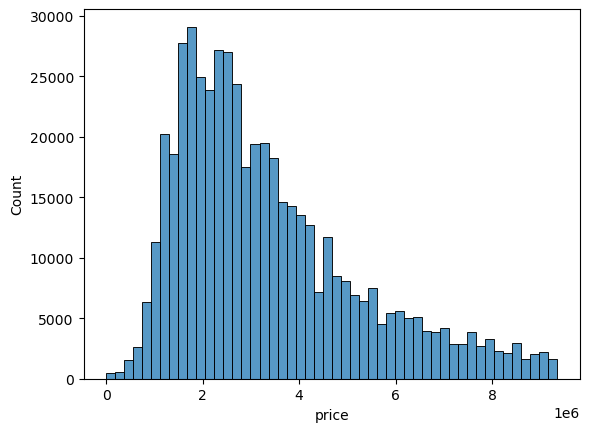

In [69]:
sns.histplot(df['price'],bins=50)

Наблюдается правостороння ассиметрия, то есть Мо< Me <Xср. 

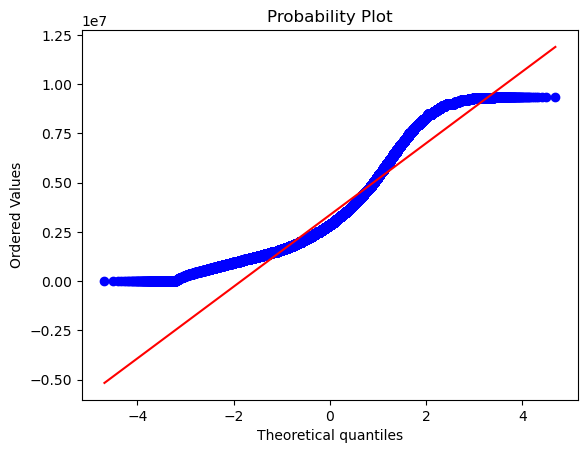

In [70]:
st.probplot(df['price'],dist='norm',plot=plt)
plt.show()

(array([17652., 17775., 17897., 18017., 18140., 18262., 18383., 18506.,
        18628., 18748.]),
 [Text(17652.0, 0, '2018-05'),
  Text(17775.0, 0, '2018-09'),
  Text(17897.0, 0, '2019-01'),
  Text(18017.0, 0, '2019-05'),
  Text(18140.0, 0, '2019-09'),
  Text(18262.0, 0, '2020-01'),
  Text(18383.0, 0, '2020-05'),
  Text(18506.0, 0, '2020-09'),
  Text(18628.0, 0, '2021-01'),
  Text(18748.0, 0, '2021-05')])

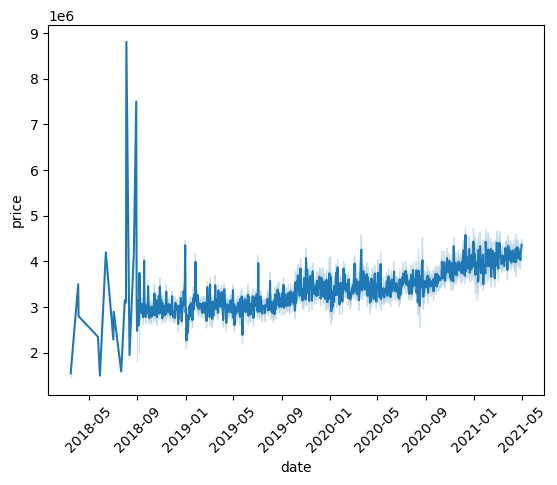

In [71]:
sns.lineplot(x=df['date'],y=df['price'])
plt.xticks(rotation=45)

In [72]:
task_2_1= df.groupby('level')['price'].mean().sort_values(ascending=False).reset_index()
px.bar(task_2_1,x='level',y='price')

In [73]:
task_2_1= df.groupby('rooms')['price'].mean().sort_values(ascending=False).reset_index()
px.bar(task_2_1,x='rooms',y='price')

In [74]:
task_2_2= df.groupby('building_type')['price'].mean().sort_values(ascending=False).reset_index().head(5)
px.bar(task_2_2,x='building_type',y='price')

In [75]:
df['month'] = pd.DatetimeIndex(df['date']).month
df['year'] = pd.DatetimeIndex(df['date']).year

task_2 = df.groupby('month')['price'].mean().reset_index().sort_values(by=['month'])
dict_months = {1: 'Январь', 2: 'Февраль', 3: 'Март', 4: 'Апрель', 5: 'Май', 6: 'Июнь', 7: 'Июль', 8: 'Август', 9: 'Сентябрь', 10: 'Октябрь', 11: 'Ноябрь',12:'Декабрь'}
task_2['month'] = task_2['month'].map(dict_months)
task_2

,month,price
0,Январь,3.328188e+06
1,Февраль,3.368986e+06
2,Март,3.523306e+06
3,Апрель,3.556493e+06
4,Май,3.222844e+06
5,Июнь,3.252570e+06
6,Июль,3.299804e+06
7,Август,3.265629e+06
8,Сентябрь,3.278774e+06
9,Октябрь,3.309921e+06


In [76]:
df

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,p_per_m,month,year
3757157,6169640,2020-06-30,Москва,1,2,17,1,42.20,16.00,2,146200.00,6,2020
4590439,3950000,2020-12-08,Московская область,3,14,17,1,37.20,10.00,1,106182.80,12,2020
4801021,8400000,2021-02-16,Московская область,2,6,9,2,65.00,12.12,1,129230.77,2,2021
5079120,6490000,2021-04-09,Нижегородская область,3,4,8,1,45.12,10.25,2,143838.65,4,2021
3999946,3540000,2020-08-04,Санкт-Петербург,3,2,6,-1,29.30,1.00,1,120819.11,8,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
815841,3600000,2018-12-31,Нижегородская область,1,4,9,3,63.40,7.20,1,56782.33,12,2018
4966232,2551700,2021-03-21,Свердловская область,2,12,14,-1,26.86,5.04,2,95000.00,3,2021
5009482,3450000,2021-03-31,Новосибирская область,1,9,9,3,60.00,7.00,1,57500.00,3,2021
2264565,3750000,2019-08-27,Краснодарский край,4,7,9,3,73.00,9.00,1,51369.86,8,2019


In [77]:
task_2_2018 = df.query('year<=2018').groupby('month')['price'].mean().reset_index().sort_values(by=['month'])
task_2_2018['month'] = task_2_2018['month'].map(dict_months)
px.bar(task_2_2018,x='month',y='price')

In [78]:
task_2_2019 = df.query('2018<year<=2019').groupby('month')['price'].mean().reset_index().sort_values(by=['month'])
task_2_2019['month'] = task_2_2019['month'].map(dict_months)
px.bar(task_2_2019,x='month',y='price')

In [79]:
task_2_2020 = df.query('2019<year<=2020').groupby('month')['price'].mean().reset_index().sort_values(by=['month'])
task_2_2020['month'] = task_2_2020['month'].map(dict_months)
px.bar(task_2_2020,x='month',y='price')

In [80]:
task_2_2021 = df.query('2020<year<=2021').groupby('month')['price'].mean().reset_index().sort_values(by=['month'])
task_2_2021['month'] = task_2_2021['month'].map(dict_months)
px.bar(task_2_2021,x='month',y='price')

In [81]:
task_2_4 = df.groupby('region')['price'].mean().sort_values(ascending=False).reset_index().head(10)
px.bar(task_2_4,x='region',y='price')

Сводка по разделу: 
1. Зависимость цены квартиры от сезонности особо не наблюдается, однако существует некоторая тенденция возрастания цены к концу года 
2. Можно пронаблюдать определённую положительную связь между этажом квартиры и её стоимости
3. Как и в ситуации со средней стоимостью квадратного метра квартиры, наблюдаем тенденцию к увеличению цены квартиры со временем 
4. Основными факторами, влияющими на цену квартиры, как это не очевидно, это количество комнат в квартире, её площадь, этаж помещения и город/субъект РФ, в котором находится недвижимость

# Когда выгодно покупать/продавать объект недвижимости?

На основе приведённой выше инфографики можно сделать вывод, что выгодно покупать недвижимость в январе, а продавать в декабре. Подтвердим данный тезис на основе статистических графиков и проверки гипотез.

In [82]:
px.bar(task_2_2019,x='month',y='price')

In [83]:
px.bar(task_2_2020,x='month',y='price')

C:\PerfLogs\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



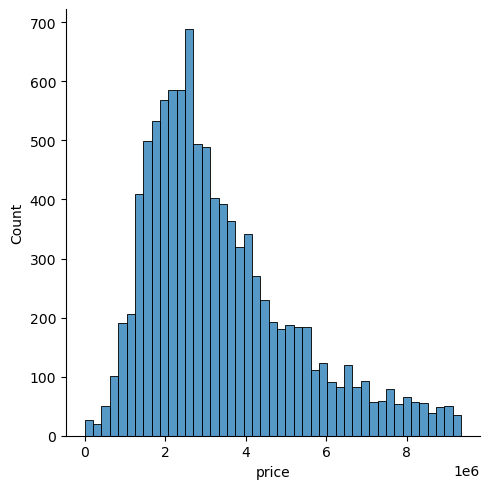

In [104]:
sns.displot(data=df.loc[(df['year']==2020)&(df['month']==1),'price'])

In [84]:
price_jan_2019 = np.array(df.loc[(df['month']==1)&(df['year']==2019),'price'].values)
price_dec_2019 = np.array(df.loc[(df['month']==12)&(df['year']==2019),'price'].values)
price_jan_2020 = np.array(df.loc[(df['month']==1)&(df['year']==2020),'price'].values)
price_dec_2020 = np.array(df.loc[(df['month']==12)&(df['year']==2020),'price'].values)

In [86]:
stat, p = st.ttest_ind(price_jan_2019,price_dec_2019)

alpha = 0.05
if p < alpha:
    print('отвергаем нулевую гипотезу о равенстве средних')
else:
        print('принимаем нулевую гипотезу')

отвергаем нулевую гипотезу о равенстве средних


In [87]:
price_jan_2019.mean()<price_dec_2019.mean()

True

In [88]:
stat, p = st.ttest_ind(price_jan_2020,price_dec_2020)

alpha = 0.05
if p < alpha:
    print('отвергаем нулевую гипотезу о равенстве средних')
else:
        print('принимаем нулевую гипотезу')

отвергаем нулевую гипотезу о равенстве средних


In [89]:
price_jan_2020.mean()<price_dec_2020.mean()

True

# Создайте модель прогноза цены объекта недвижимости.

In [90]:
df_2.head()

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,p_per_m
0,6050000,2018-02-19,Санкт-Петербург,1,8,10,3,82.6,10.8,1,73244.55
1,8650000,2018-02-27,Московская область,3,5,24,2,69.1,12.0,1,125180.90
2,4000000,2018-02-28,Нижегородская область,1,5,9,3,66.0,10.0,1,60606.06
3,1850000,2018-03-01,Краснодарский край,4,12,16,2,38.0,5.0,2,48684.21
4,5450000,2018-03-01,Московская область,3,13,14,2,60.0,10.0,1,90833.33


<Axes: xlabel='level', ylabel='Density'>

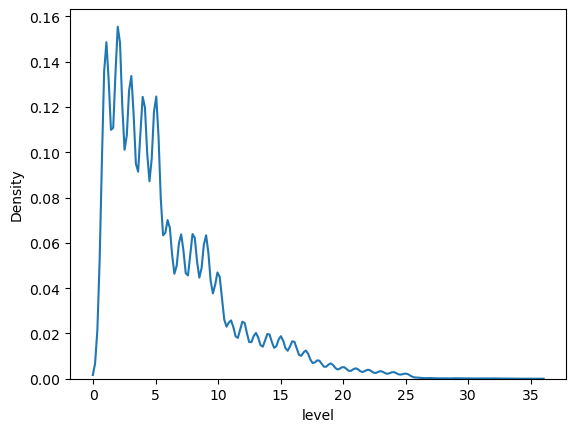

In [91]:
sns.kdeplot(data=df['level'])

<Axes: xlabel='rooms', ylabel='Density'>

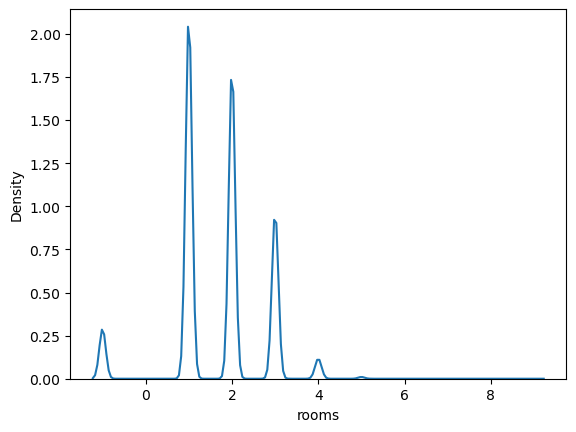

In [92]:
sns.kdeplot(data=df['rooms'])

<Axes: xlabel='area', ylabel='Density'>

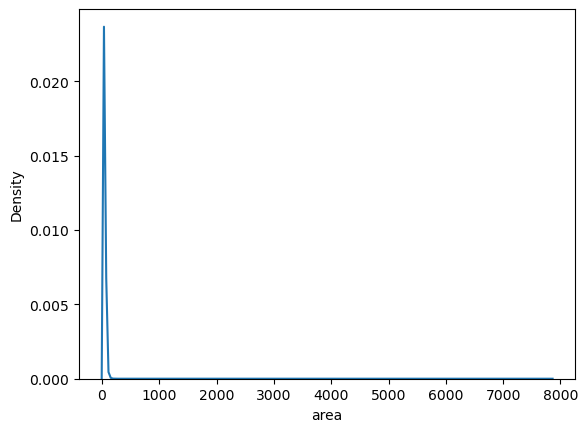

In [93]:
sns.kdeplot(data=df['area'])

При использовании линейной регрессии требуется нормализовать признаки, чтобы сравнивать их веса. Это достигается путем приведения признаков к стандартному виду. Используем стандартизацию, чтобы привести данные к нулевому среднему значению и единичному стандартному отклонению.

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [95]:
x=df_2[['level','rooms','area']]
y = df_2['price']

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [97]:
x_train_st = scaler.fit_transform(x_train)

In [98]:
model = LinearRegression()
model.fit(x_train_st, y_train)
y_pred = model.predict(x_test)

C:\PerfLogs\Lib\site-packages\sklearn\base.py:458: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



In [99]:
y_pred

array([21427813.17253155, 15882655.17173675, 27450564.73095099, ...,
       17992643.52936641, 34187758.00225158, 16741385.28696901])